In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/home/mahaputra971/pt_skp/agoda_reviews_9_1_2026.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   reviewer_name       159 non-null    object 
 1   user_country        155 non-null    object 
 2   room_type           139 non-null    object 
 3   stay_duration_days  159 non-null    int64  
 4   rating              159 non-null    float64
 5   review_text         159 non-null    object 
 6   review_date         155 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.8+ KB


In [10]:
# Tentukan tanggal akhir
end_date = '2025-12-31'

# Konversi kolom ke datetime terlebih dahulu
df['review_date'] = pd.to_datetime(df['review_date'])

# Filter dataframe berdasarkan tanggal
df = df[(df['review_date'] <= end_date)]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 158
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reviewer_name       155 non-null    object        
 1   user_country        151 non-null    object        
 2   room_type           135 non-null    object        
 3   stay_duration_days  155 non-null    int64         
 4   rating              155 non-null    float64       
 5   review_text         155 non-null    object        
 6   review_date         155 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 9.7+ KB


In [12]:
df.head(10)

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date
0,Francoise,Indonesia,Two-Bedroom Villa,1,8.4,It’s our second time staying here. We love tha...,2025-12-11
1,Raphaël,United Kingdom,1 Bedroom Suite,5,8.8,A most amazing spot for a relaxed getaway from...,2025-01-08
2,andrew,Australia,1 Bedroom Suite,3,9.6,This place was great. Ticked both boxes. Yoga ...,2025-05-31
3,tomomi,Indonesia,1 Bedroom Suite,2,8.8,Good: \nIt’s in front of surf spot .\nLooking ...,2025-08-11
4,Liesl,South Africa,1 Bedroom Suite,4,8.0,Possibly the best location in Balian for surfi...,2025-06-06
6,Mike,United States,1 Bedroom Suite,1,10.0,This place is really exceptional! Right on the...,2025-03-04
7,Keith,Australia,Family for 4,8,8.8,Great week for a family of 4 with a baby and a...,2024-10-27
8,Callum,Australia,Family for 4,4,8.0,Stunning location and amazing staff. We loved ...,2024-07-14
9,Kathleen,Australia,1 Bedroom Suite,14,10.0,Pondok Pitaya is a gem. It's a few hours drive...,2024-09-13
10,Michelle,Australia,Family for 4,3,10.0,This resort exceeds all expectations. It was s...,2024-09-17


In [13]:
df['review_date'] = pd.to_datetime(df['review_date'])
print(df['review_date'].dtypes)

datetime64[ns]


In [14]:
df.head() 

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date
0,Francoise,Indonesia,Two-Bedroom Villa,1,8.4,It’s our second time staying here. We love tha...,2025-12-11
1,Raphaël,United Kingdom,1 Bedroom Suite,5,8.8,A most amazing spot for a relaxed getaway from...,2025-01-08
2,andrew,Australia,1 Bedroom Suite,3,9.6,This place was great. Ticked both boxes. Yoga ...,2025-05-31
3,tomomi,Indonesia,1 Bedroom Suite,2,8.8,Good: \nIt’s in front of surf spot .\nLooking ...,2025-08-11
4,Liesl,South Africa,1 Bedroom Suite,4,8.0,Possibly the best location in Balian for surfi...,2025-06-06


In [15]:
def plot_barplot(data, x_col, y_col, title="", format_number="", x_label="", y_label="", colour_bar_set="3"):
    plt.figure(figsize=(10, max(6, len(data) * 0.4))) # Tinggi otomatis menyesuaikan banyaknya negara

    # --- 1. DETEKSI OTOMATIS: VERTIKAL ATAU HORIZONTAL? ---
    # Jika Y-nya angka, berarti Vertikal. Jika Y-nya teks, berarti Horizontal.
    if pd.api.types.is_numeric_dtype(data[y_col]):
        orientation = 'vertical'
        color_basis = data[y_col] # Warna ikut tinggi Y
    else:
        orientation = 'horizontal'
        color_basis = data[x_col] # Warna ikut panjang X (Jumlah)

    # --- 2. LOGIKA WARNA ---
    if colour_bar_set == "1": # Tinggi=Hijau
        norm = plt.Normalize(color_basis.min(), color_basis.max())
        sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
        colors = [sm.to_rgba(val) for val in color_basis]
    elif colour_bar_set == "2": # Tinggi=Merah
        norm = plt.Normalize(color_basis.min(), color_basis.max())
        sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=norm)
        colors = [sm.to_rgba(val) for val in color_basis]
    else: # Mode 3 (Default Biru - Aman untuk Kategori)
        colors = ["#4c72b0"] * len(data)
        sm = None

    # --- 3. MEMBUAT PLOT ---
    barplot = sns.barplot(
        x=x_col, 
        y=y_col,
        data=data,
        palette=colors,
        hue=y_col if orientation == 'horizontal' else x_col, # Fix warning seaborn baru
        legend=False
    )

    # --- 4. MEMBERI LABEL ANGKA (SMART POSITIONING) ---
    for bar in barplot.patches:
        # Ambil dimensi batang
        width = bar.get_width()
        height = bar.get_height()
        
        # Tentukan nilai yang akan ditulis
        value = width if orientation == 'horizontal' else height
        if np.isnan(value): continue

        # Format label
        if isinstance(value, float):
            label_text = f"{format_number}{value:.2f}"
            if value.is_integer(): label_text = f"{format_number}{int(value)}"
        else:
            label_text = f"{format_number}{int(value)}"

        # Tentukan posisi teks
        if orientation == 'horizontal':
            # Jika horizontal, teks ditaruh di sebelah kanan ujung batang
            text_x = width + (data[x_col].max() * 0.01) # Beri sedikit jarak
            text_y = bar.get_y() + height / 2
            ha_align = 'left'
            color_text = 'black' # Teks hitam biar terbaca di background putih
        else:
            # Jika vertikal, teks ditaruh di tengah/atas batang
            text_x = bar.get_x() + width / 2
            text_y = bar.get_y() + height / 2
            ha_align = 'center'
            color_text = 'white'

        plt.text(
            text_x, 
            text_y, 
            label_text, 
            va='center', 
            ha=ha_align, 
            fontsize=10, 
            color=color_text, 
            weight='bold'
        )

    # Kosmetik
    plt.title(title, loc="center", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(x_label if x_label else x_col, fontsize=12)
    plt.ylabel(y_label if y_label else y_col, fontsize=12)
    
    if orientation == 'vertical':
        plt.grid(axis='y', linestyle='--', alpha=0.3)
    else:
        plt.grid(axis='x', linestyle='--', alpha=0.3) # Grid X untuk horizontal

    plt.tight_layout()
    plt.show()

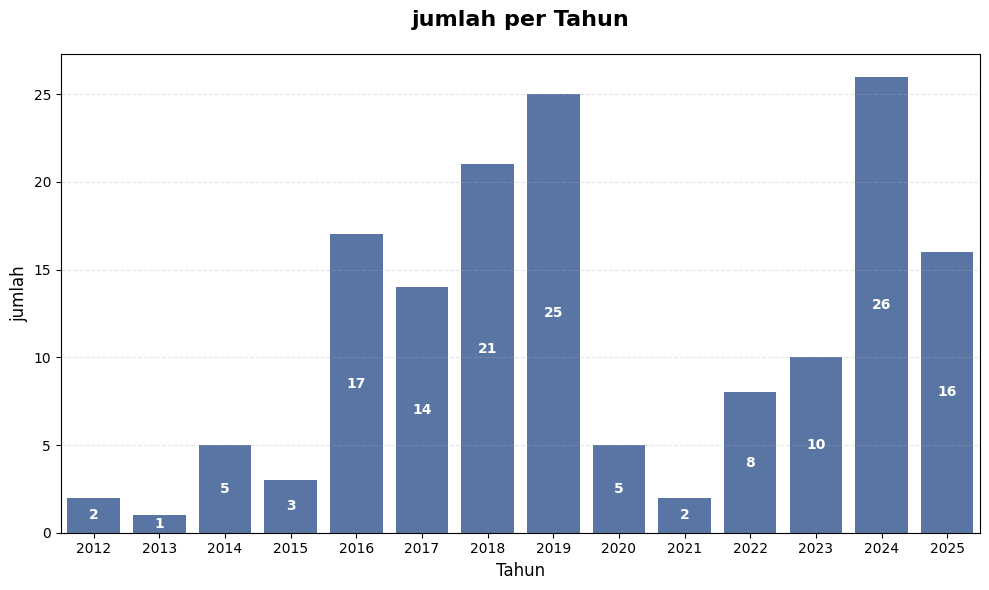

,tahun,jumlah
0,2012,2
1,2013,1
2,2014,5
3,2015,3
4,2016,17
5,2017,14
6,2018,21
7,2019,25
8,2020,5
9,2021,2


In [16]:
# --- 1. DATA PREPARATION ---

# Pastikan kolom tanggal bertipe datetime
# Jika format tanggalmu beda (misal: "12 Dec 2023"), pandas biasanya otomatis mengenali
df['review_date'] = pd.to_datetime(df['review_date'])

# Ekstrak tahun ke kolom baru
df['year'] = df['review_date'].dt.year

# Hitung jumlah review per tahun dan URUTKAN BERDASARKAN TAHUN (sort_index)
# Kita pakai sort_index() agar tahunnya urut (2020, 2021, 2022...), bukan acak.
year_counts = df['year'].value_counts().sort_index()

# Konversi ke DataFrame agar mudah di-plot seaborn
year_df = year_counts.reset_index()
year_df.columns = ['tahun', 'jumlah']

# --- 2. VISUALISASI (Best Practice) ---

plot_barplot(
    data=year_df, 
    x_col="tahun", 
    y_col="jumlah", 
    title="jumlah per Tahun", 
    x_label="Tahun",
    y_label="jumlah",
    colour_bar_set="3" # Gunakan 3 (Biru) untuk data tahunan agar netral
)

year_df

In [17]:
df

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date,year
0,Francoise,Indonesia,Two-Bedroom Villa,1,8.4,It’s our second time staying here. We love tha...,2025-12-11,2025
1,Raphaël,United Kingdom,1 Bedroom Suite,5,8.8,A most amazing spot for a relaxed getaway from...,2025-01-08,2025
2,andrew,Australia,1 Bedroom Suite,3,9.6,This place was great. Ticked both boxes. Yoga ...,2025-05-31,2025
3,tomomi,Indonesia,1 Bedroom Suite,2,8.8,Good: \nIt’s in front of surf spot .\nLooking ...,2025-08-11,2025
4,Liesl,South Africa,1 Bedroom Suite,4,8.0,Possibly the best location in Balian for surfi...,2025-06-06,2025
...,...,...,...,...,...,...,...,...
154,philippa,Australia,1 Bedroom Suite,3,9.2,Great place to relax and slow down. Very Balin...,2023-12-04,2023
155,CRAIG,Australia,1 Bedroom Suite,22,10.0,Excellent accomm right on Balian surf break.,2023-07-17,2023
156,Coen,Indonesia,1 Bedroom Suite,1,6.0,The location is the drawcard.\nNice gardens.\n...,2023-09-26,2023
157,Luke,Australia,1 Bedroom Suite,5,5.2,"Could be much better, everything is old, bed w...",2023-07-14,2023


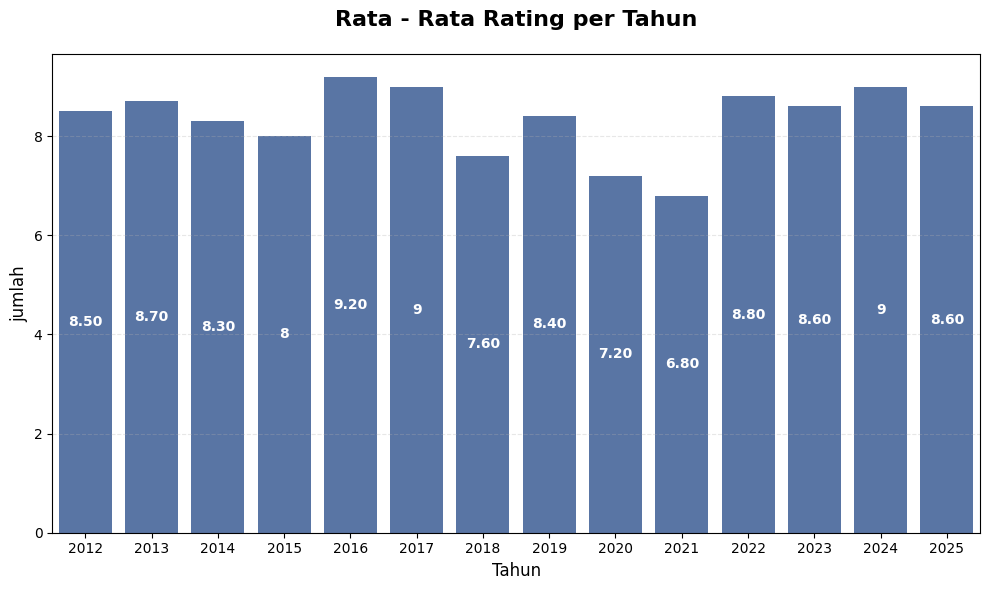

In [18]:

plot_barplot(
    data=df.reset_index().groupby('year').rating.median().reset_index(name='rating'), 
    x_col="year", 
    y_col="rating", 
    title="Rata - Rata Rating per Tahun", 
    x_label="Tahun",
    y_label="jumlah",
    colour_bar_set="3" # Gunakan 3 (Biru) untuk data tahunan agar netral
)

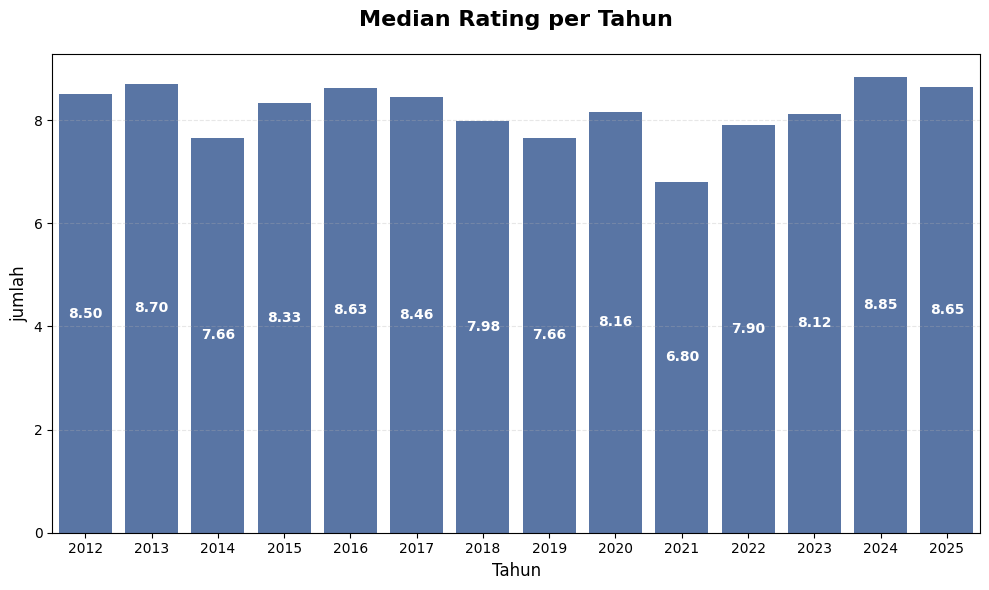

In [19]:

plot_barplot(
    data=df.reset_index().groupby('year').rating.mean().reset_index(name='rating'), 
    x_col="year", 
    y_col="rating", 
    title="Median Rating per Tahun", 
    x_label="Tahun",
    y_label="jumlah",
    colour_bar_set="3" # Gunakan 3 (Biru) untuk data tahunan agar netral
)

## 2. Text Mining

In [20]:
# Pastikan nama kolom tahun sesuai (misal 'Year' atau 'year')
# zip menggabungkan dua kolom menjadi pasangan
review_with_year = list(zip(df['year'], df['review_text']))

# Cek 5 data pertama
print(review_with_year)

[(2025, 'It’s our second time staying here. We love that it’s right on the beach. Food was quite good ..We had minor issues like the toilet flush didn’t work properly, the pool looked like it hadn’t been cleaned but maybe because it’s the rainy season so it looked a bit dirty. But overall it was a good staycation.'), (2025, "A most amazing spot for a relaxed getaway from the chaos that has dominated most of Bali's beaches. This hotel is right by the break, perfect for surfers and beach lovers alike.\n\nThe staff are very kind and welcoming and always at your service. The grounds are really well thought out and can often times be quite majestic to walk around in. Finally, for the rooms, they are well designed with comfortable beds, however, it's a real shame that the walls are paper thin so if you have neighbors, you can hear everything that happens in the next room, even whispers.\n\nBut, all in all, a great getaway!"), (2025, 'This place was great. Ticked both boxes. Yoga for my girlf

## 3. user_country

      user_country  jumlah
0        Australia      78
5        Indonesia      13
20  United Kingdom       8
21   United States       7
4          Germany       6
12     New Zealand       6
9            Japan       5
2           Canada       5
11     Netherlands       5
3           France       4
15          Russia       2
19     Switzerland       2
8            Italy       1
10        Malaysia       1
1          Austria       1
7           Israel       1
14          Poland       1
16       Singapore       1
17    South Africa       1
18           Spain       1
6          Ireland       1
13            Oman       1


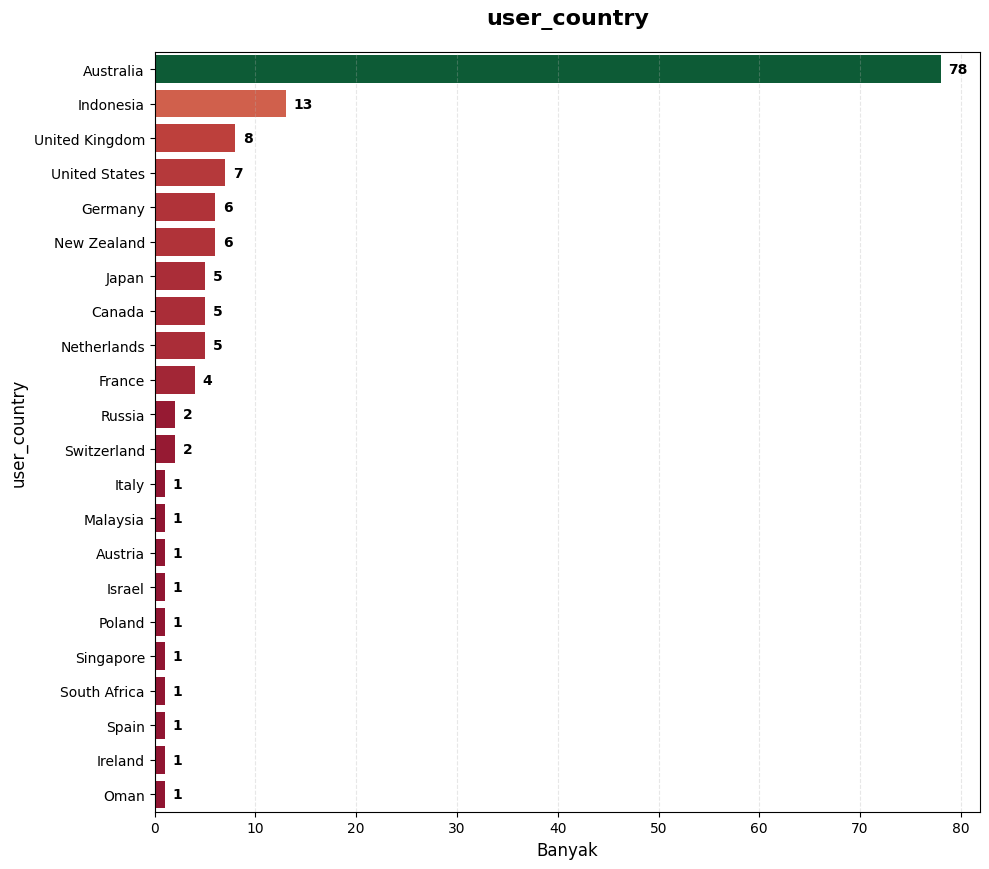

In [21]:
''' 
Membuat sort list dan visualisasi banyak orang tiap user_country
'''
count_gender = df.groupby('user_country').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_gender)  
plot_barplot(
    data=count_gender,
    x_col="jumlah",
    y_col="user_country", 
    title="user_country",
    format_number="",
    x_label="Banyak",
    colour_bar_set="1"
)

                                room_type  jumlah
0                         1 Bedroom Suite     119
1  2 Bedroom Villa with Ocean View Pool 1       5
2                            Family for 4       5
4                        Villa (4 Adults)       5
3                       Two-Bedroom Villa       1


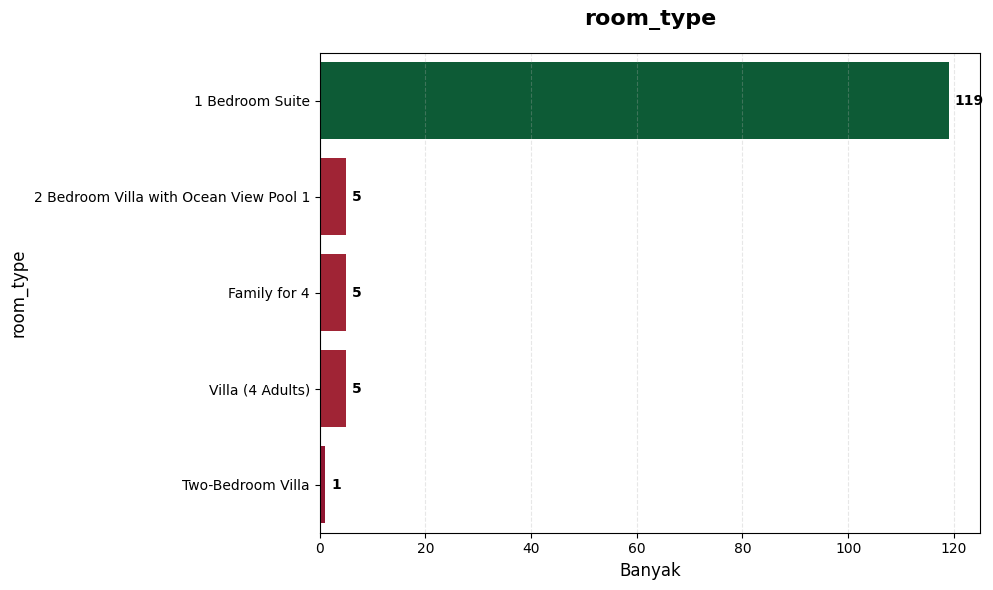

In [22]:
''' 
Membuat sort list dan visualisasi banyak orang tiap room_view
'''
count_gender = df.groupby('room_type').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_gender)  
plot_barplot(
    data=count_gender,
    x_col="jumlah",
    y_col="room_type", 
    title="room_type",
    format_number="",
    x_label="Banyak",
    colour_bar_set="1"
)

    stay_duration_days  jumlah
0                    1      40
2                    3      37
1                    2      29
3                    4      19
4                    5      14
5                    6       4
7                    8       4
6                    7       3
8                   10       1
9                   11       1
10                  12       1
11                  14       1
12                  22       1


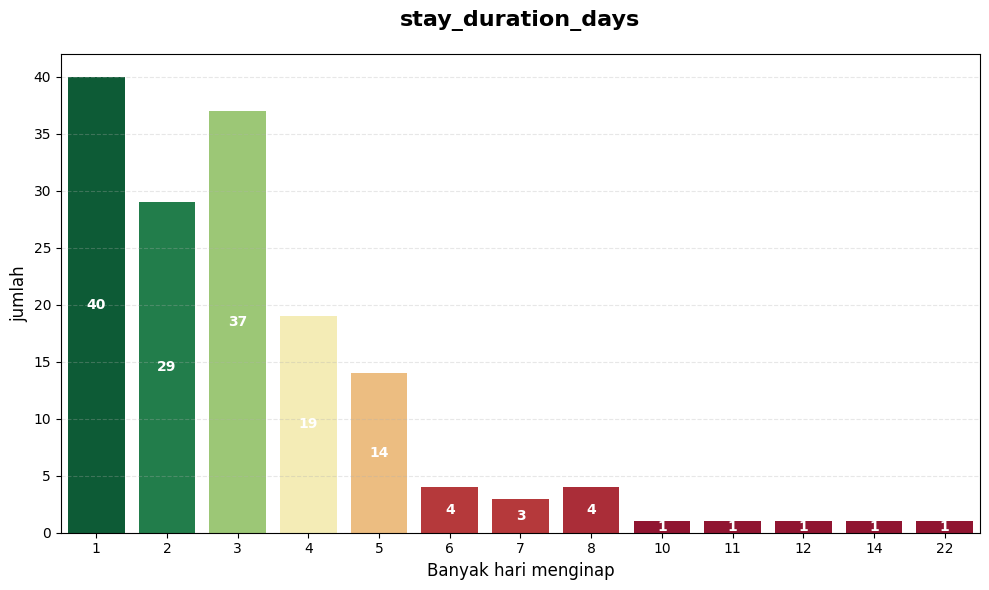

In [23]:
''' 
Membuat sort list dan visualisasi banyak orang tiap stay_duration_days
'''
count_gender = df.groupby('stay_duration_days').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_gender)  
plot_barplot(
    data=count_gender,
    x_col="stay_duration_days",
    y_col="jumlah", 
    title="stay_duration_days",
    format_number="",
    x_label="Banyak hari menginap",
    colour_bar_set="1"
)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_multivariate_barplot(df, x_col, hue_col, title="", x_label="", y_label="Jumlah", top_n_hue=5, palette="tab20"):
    """
    Fungsi template Grouped Bar Chart + Garis Tren (MAXIMUM CONTRAST).
    Dengan warna berlawanan, garis tebal, dan marker besar untuk visual impact tinggi.
    """
    # --- 1. DATA PREPARATION ---
    data_grouped = df.groupby([x_col, hue_col]).size().reset_index(name='counts')

    # --- 2. FILTER TOP N ---
    top_categories = df[hue_col].value_counts().nlargest(top_n_hue).index.tolist()
    
    # [PENTING] Agar garis tidak terputus, kita buat dataframe lengkap untuk semua kombinasi X dan Hue
    all_x = sorted(df[x_col].unique().astype(str))
    mux = pd.MultiIndex.from_product([all_x, top_categories], names=[x_col, hue_col])
    
    data_filtered = data_grouped[data_grouped[hue_col].isin(top_categories)].copy()
    data_filtered[x_col] = data_filtered[x_col].astype(str)
    
    # Gabungkan dengan template lengkap agar data yang kosong terisi 0
    data_filtered = data_filtered.set_index([x_col, hue_col]).reindex(mux, fill_value=0).reset_index()

    # --- 3. PREPARE COLORS (MAXIMUM CONTRAST) ---
    n_colors = len(top_categories)
    # Gunakan 'tab20' untuk maximum contrast warna berlawanan
    colors = sns.color_palette(palette, n_colors=n_colors)
    color_map = {cat: colors[i % len(colors)] for i, cat in enumerate(top_categories)}

    # --- 4. VISUALISASI ---
    plt.figure(figsize=(14, 7))

    # LAYER 1: BAR PLOT - WARNA SOLID DENGAN EDGE TEBAL & GELAP
    sns.barplot(
        data=data_filtered,
        x=x_col,
        y='counts',
        hue=hue_col,
        palette=color_map,
        hue_order=top_categories,
        edgecolor='#222222',  # Edge gelap untuk kontras lebih
        linewidth=1.5,  # LEBIH TEBAL untuk mencolok
        alpha=1.0
    )

    # LAYER 2: POINT PLOT - GARIS TEBAL & MARKER BESAR
    sns.pointplot(
        data=data_filtered,
        x=x_col,
        y='counts',
        hue=hue_col,
        palette=color_map,
        hue_order=top_categories,
        markers="o",
        markersize=10,  # MARKER LEBIH BESAR untuk mencolok
        linewidth=3.0,  # GARIS LEBIH TEBAL untuk menonjol
        dodge=0.55,
        linestyle="-"
    )

    # Kosmetik Grafik
    plt.title(title, fontsize=16, fontweight='bold', pad=15)
    plt.xlabel(x_label if x_label else x_col, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Perbaiki Legend agar tidak duplikat
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:len(top_categories)], labels[:len(top_categories)], 
               title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.3, linewidth=0.8)
    plt.tight_layout()
    print(data_filtered)
    plt.show()



    year  stay_duration_days  counts
0   2012                   1       0
1   2012                   3       1
2   2012                   2       1
3   2012                   4       0
4   2013                   1       0
5   2013                   3       0
6   2013                   2       1
7   2013                   4       0
8   2014                   1       1
9   2014                   3       2
10  2014                   2       1
11  2014                   4       0
12  2015                   1       1
13  2015                   3       1
14  2015                   2       0
15  2015                   4       0
16  2016                   1       2
17  2016                   3       6
18  2016                   2       1
19  2016                   4       4
20  2017                   1       2
21  2017                   3       3
22  2017                   2       4
23  2017                   4       2
24  2018                   1       9
25  2018                   3       2
2

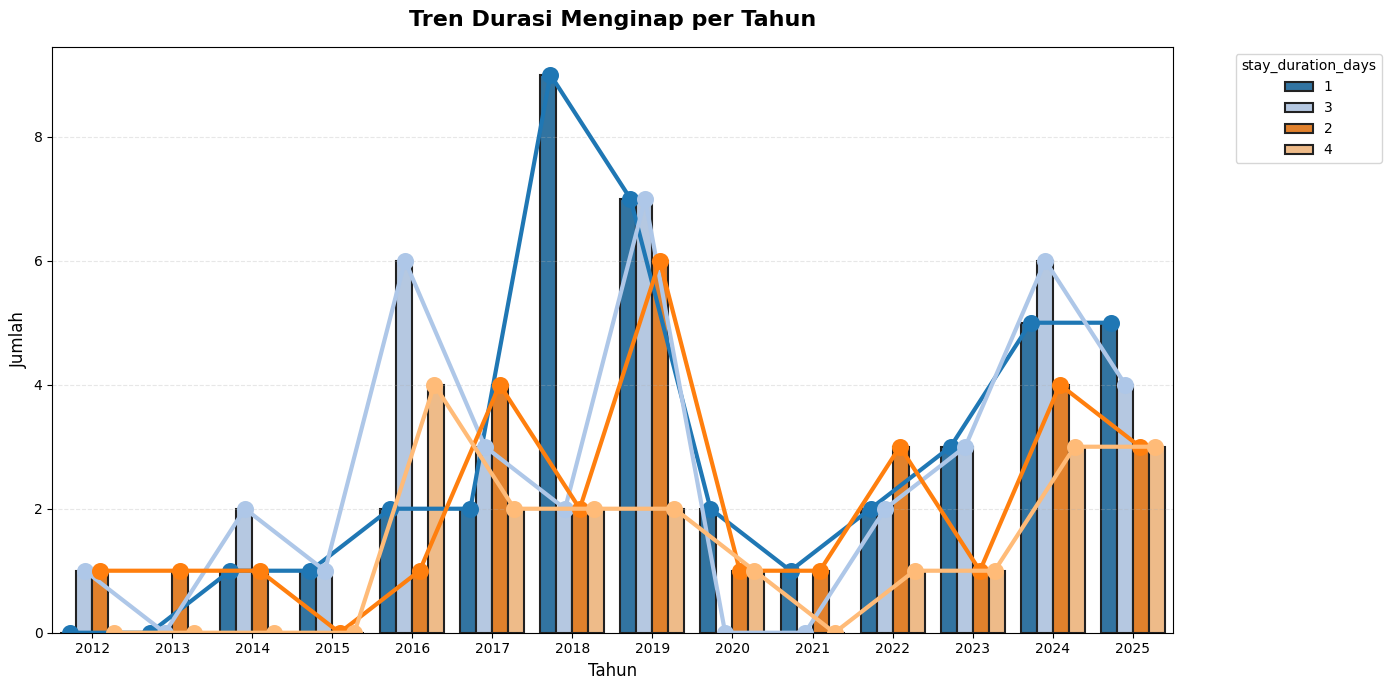

In [35]:
plot_multivariate_barplot(
    df=df,
    x_col="year",
    hue_col="stay_duration_days", # Ganti dengan nama kolom hasil regex tadi
    title="Tren Durasi Menginap per Tahun",
    x_label="Tahun",
    top_n_hue=4 # Hanya ambil 4 durasi terpopuler (misal 1, 2, 3, 4 malam)
)

     year    user_country  counts
0    2012       Australia       0
1    2012       Indonesia       0
2    2012  United Kingdom       1
3    2012   United States       0
4    2012     New Zealand       0
..    ...             ...     ...
135  2025         Germany       3
136  2025           Japan       0
137  2025     Netherlands       0
138  2025          Canada       0
139  2025          France       0

[140 rows x 3 columns]


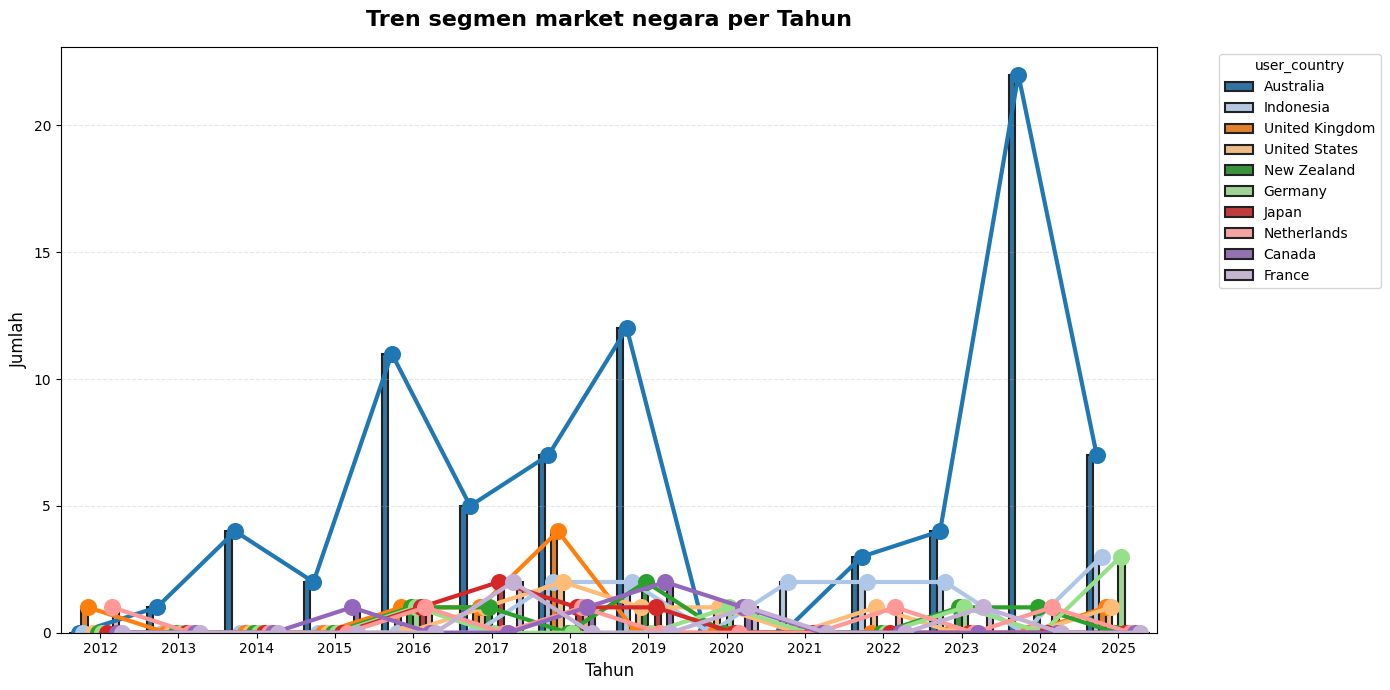

In [36]:
plot_multivariate_barplot(
    df=df,
    x_col="year",
    hue_col="user_country", # Ganti dengan nama kolom hasil regex tadi
    title="Tren segmen market negara per Tahun",
    x_label="Tahun",
    top_n_hue=10 # Hanya ambil 4 durasi terpopuler (misal 1, 2, 3, 4 malam)
)

In [27]:
df

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date,year
0,Francoise,Indonesia,Two-Bedroom Villa,1,8.4,It’s our second time staying here. We love tha...,2025-12-11,2025
1,Raphaël,United Kingdom,1 Bedroom Suite,5,8.8,A most amazing spot for a relaxed getaway from...,2025-01-08,2025
2,andrew,Australia,1 Bedroom Suite,3,9.6,This place was great. Ticked both boxes. Yoga ...,2025-05-31,2025
3,tomomi,Indonesia,1 Bedroom Suite,2,8.8,Good: \nIt’s in front of surf spot .\nLooking ...,2025-08-11,2025
4,Liesl,South Africa,1 Bedroom Suite,4,8.0,Possibly the best location in Balian for surfi...,2025-06-06,2025
...,...,...,...,...,...,...,...,...
154,philippa,Australia,1 Bedroom Suite,3,9.2,Great place to relax and slow down. Very Balin...,2023-12-04,2023
155,CRAIG,Australia,1 Bedroom Suite,22,10.0,Excellent accomm right on Balian surf break.,2023-07-17,2023
156,Coen,Indonesia,1 Bedroom Suite,1,6.0,The location is the drawcard.\nNice gardens.\n...,2023-09-26,2023
157,Luke,Australia,1 Bedroom Suite,5,5.2,"Could be much better, everything is old, bed w...",2023-07-14,2023


                                room_type    rating
4                        Villa (4 Adults)  7.440000
1  2 Bedroom Villa with Ocean View Pool 1  7.860000
0                         1 Bedroom Suite  8.309244
3                       Two-Bedroom Villa  8.400000
2                            Family for 4  8.960000


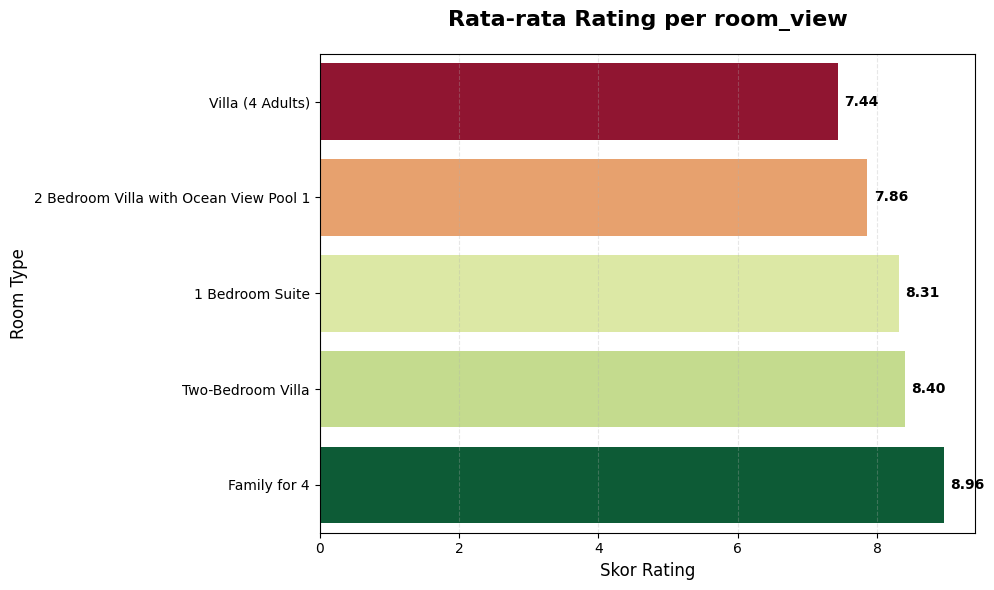

In [28]:
# Reset index agar 'Year' kembali menjadi kolom
rating_room_year = df.groupby('room_type')['rating'].mean().reset_index()

rating_room_year = rating_room_year[rating_room_year!= 0]

# Opsional: Urutkan tahun biar rapi
rating_room_year = rating_room_year.sort_values('rating')

print(rating_room_year)

# --- CARA PENGGUNAAN ---
plot_barplot(
    data=rating_room_year , 
    x_col="rating", 
    y_col="room_type", 
    title="Rata-rata Rating per room_view", 
    x_label="Skor Rating",
    y_label="Room Type",
    colour_bar_set="1" # Gunakan 3 (Biru) untuk data tahunan agar netral
)

In [29]:
filtered_df = df[df['review_text'] != 0].copy()
# Baru di-grouping
dislike_by_room_view = filtered_df.groupby('room_type')['review_text'].apply(list)

# --- CARA MENGAKSES HASILNYA (Sama seperti kodemu) ---
print("=== Statistik Dislike per Kamar ===")
for room_type, comments in dislike_by_room_view.items():
    print(f"Pada {room_type}: Ditemukan {len(comments)} komentar.")
    print(f"{comments}") 
    print("-" * 30)

=== Statistik Dislike per Kamar ===
Pada 1 Bedroom Suite: Ditemukan 119 komentar.
["A most amazing spot for a relaxed getaway from the chaos that has dominated most of Bali's beaches. This hotel is right by the break, perfect for surfers and beach lovers alike.\n\nThe staff are very kind and welcoming and always at your service. The grounds are really well thought out and can often times be quite majestic to walk around in. Finally, for the rooms, they are well designed with comfortable beds, however, it's a real shame that the walls are paper thin so if you have neighbors, you can hear everything that happens in the next room, even whispers.\n\nBut, all in all, a great getaway!", 'This place was great. Ticked both boxes. Yoga for my girlfriend and surfing for me. \nGreat location with a great restaurant. \nThere are a few other places to eat around and about and some touristy things to fill in a few days. The pool was pretty nice as well. \nIf we go back to Balian we would definitely 

In [30]:
df

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date,year
0,Francoise,Indonesia,Two-Bedroom Villa,1,8.4,It’s our second time staying here. We love tha...,2025-12-11,2025
1,Raphaël,United Kingdom,1 Bedroom Suite,5,8.8,A most amazing spot for a relaxed getaway from...,2025-01-08,2025
2,andrew,Australia,1 Bedroom Suite,3,9.6,This place was great. Ticked both boxes. Yoga ...,2025-05-31,2025
3,tomomi,Indonesia,1 Bedroom Suite,2,8.8,Good: \nIt’s in front of surf spot .\nLooking ...,2025-08-11,2025
4,Liesl,South Africa,1 Bedroom Suite,4,8.0,Possibly the best location in Balian for surfi...,2025-06-06,2025
...,...,...,...,...,...,...,...,...
154,philippa,Australia,1 Bedroom Suite,3,9.2,Great place to relax and slow down. Very Balin...,2023-12-04,2023
155,CRAIG,Australia,1 Bedroom Suite,22,10.0,Excellent accomm right on Balian surf break.,2023-07-17,2023
156,Coen,Indonesia,1 Bedroom Suite,1,6.0,The location is the drawcard.\nNice gardens.\n...,2023-09-26,2023
157,Luke,Australia,1 Bedroom Suite,5,5.2,"Could be much better, everything is old, bed w...",2023-07-14,2023


/tmp/ipykernel_8246/3179651340.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.set_index(date_col).resample('M').size()


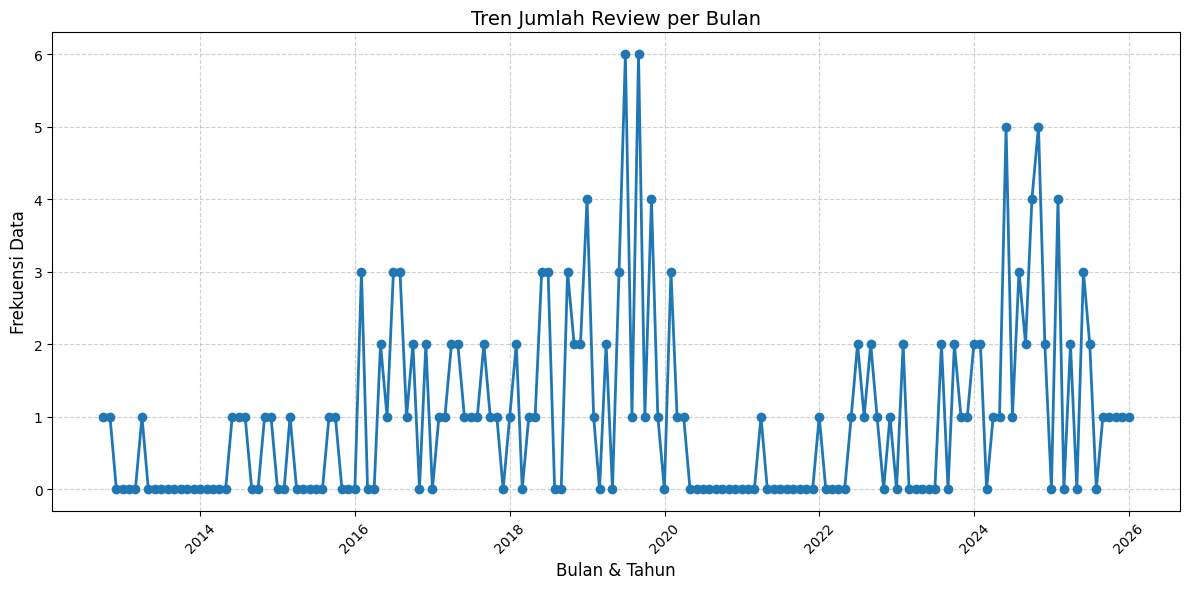

review_date
2019-08-31    6
2019-06-30    6
2024-05-31    5
2024-10-31    5
2019-10-31    4
             ..
2021-06-30    0
2021-05-31    0
2021-04-30    0
2015-06-30    0
2022-01-31    0
Length: 160, dtype: int64

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Pastikan kolom tanggal dikenali sebagai datetime
# Ganti 'published_at_date' dengan 'review_post_date' jika Anda sudah merename kolomnya
date_col = 'review_date' 
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# 2. Resample data per Bulan (M) dan hitung jumlahnya (.size())
# Kita set tanggal sebagai index dulu agar bisa di-resample
monthly_counts = df.set_index(date_col).resample('M').size()

# 3. Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='#1f77b4', linewidth=2)

# Mempercantik tampilan
plt.title(f'Tren Jumlah Review per Bulan', fontsize=14)
plt.xlabel('Bulan & Tahun', fontsize=12)
plt.ylabel('Frekuensi Data', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan
plt.show()
monthly_counts.sort_values(ascending=False)

--- Total Data Per Bulan (Akumulasi Semua Tahun) ---
review_date
June         19
January      18
May          18
September    17
October      16
August       15
July         12
March        11
November     11
December      9
April         6
February      3
Name: count, dtype: int64


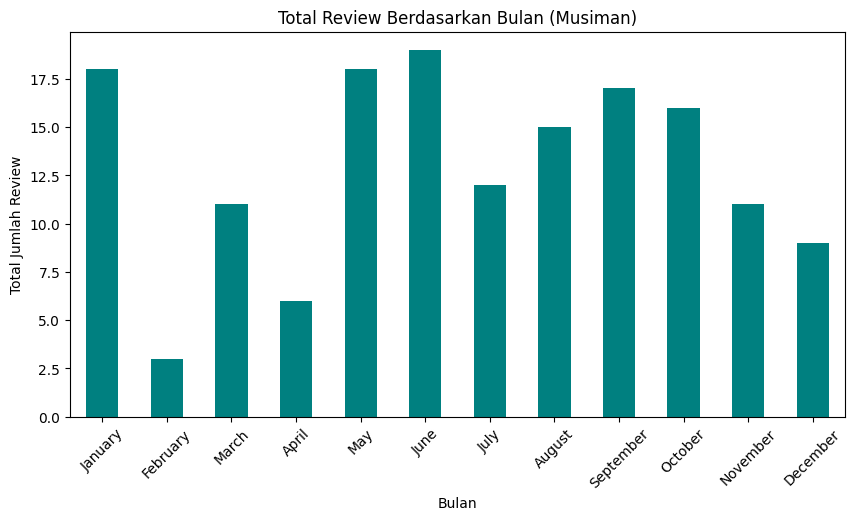

In [32]:
import pandas as pd

# 1. Pastikan kolom target sudah format datetime
col_name = 'review_date'  # Sesuaikan nama kolom tanggal Anda
df[col_name] = pd.to_datetime(df[col_name], errors='coerce')

# 2. Urutan bulan yang benar (agar tidak terurut abjad April duluan)
bulan_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# 3. Ambil nama bulan dan hitung
# dt.month_name() mengambil nama bulan (Jan, Feb, dst) mengabaikan tahun
monthly_counts = df[col_name].dt.month_name().value_counts()

# 4. Urutkan hasil sesuai kalender (bukan jumlah terbanyak)
monthly_counts = monthly_counts.reindex(bulan_order, fill_value=0)

# 5. Tampilkan Hasil
print("--- Total Data Per Bulan (Akumulasi Semua Tahun) ---")
print(monthly_counts.sort_values(ascending=False))

# --- Opsional: Tampilkan dalam Grafik Batang ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', color='teal')
plt.title('Total Review Berdasarkan Bulan (Musiman)')
plt.xlabel('Bulan')
plt.ylabel('Total Jumlah Review')
plt.xticks(rotation=45)
plt.show()